# Scatter Plot Shapes

In [1]:
from plotnine import (
    aes,
    annotate,
    coord_equal,
    element_rect,
    element_text,
    facet_wrap,
    geom_point,
    geom_segment,
    geom_text,
    geom_tile,
    ggplot,
    lims,
    scale_shape_identity,
    theme,
    theme_void,
)

import polars as pl
import numpy as np

List the shapes and prepare dataframe with what is required to display
them.

In [2]:
filled_shapes = (
    "o",  # circle
    "^",  # triangle up
    "s",  # square
    "D",  # Diamond
    "v",  # triangle down
    "*",  # star
    "p",  # pentagon
    "8",  # octagon
    "<",  # triangle left
    "h",  # hexagon1
    ">",  # triangle right
    "H",  # hexagon1
    "d",  # thin diamond
)

unfilled_shapes = (
    "+",  # plus
    "x",  # x
    ".",  # point
    "1",  # tri_down
    "2",  # tri_up
    "3",  # tri_left
    "4",  # tri_right
    ",",  # pixel
    "_",  # hline
    "|",  # vline
    0,  # tickleft
    1,  # tickright
    2,  # tickup
    3,  # tickdown
    4,  # caretleft
    5,  # caretright
    6,  # caretup
    7,  # caretdown
)

n1 = len(filled_shapes)
n2 = len(unfilled_shapes)
ncols = 10
shapes = filled_shapes + unfilled_shapes

df = pl.DataFrame({
    "x": np.hstack([np.arange(n1) % ncols, np.arange(n2) % ncols]),
    "y": 4 - 1.5 * np.hstack([np.arange(n1) // ncols, np.arange(n2) // ncols]),
    "shape": pl.Series(shapes, dtype=object),
    "shape_kind": np.repeat(["Filled Shapes", "Unfilled Shapes"], (n1, n2))
})

df

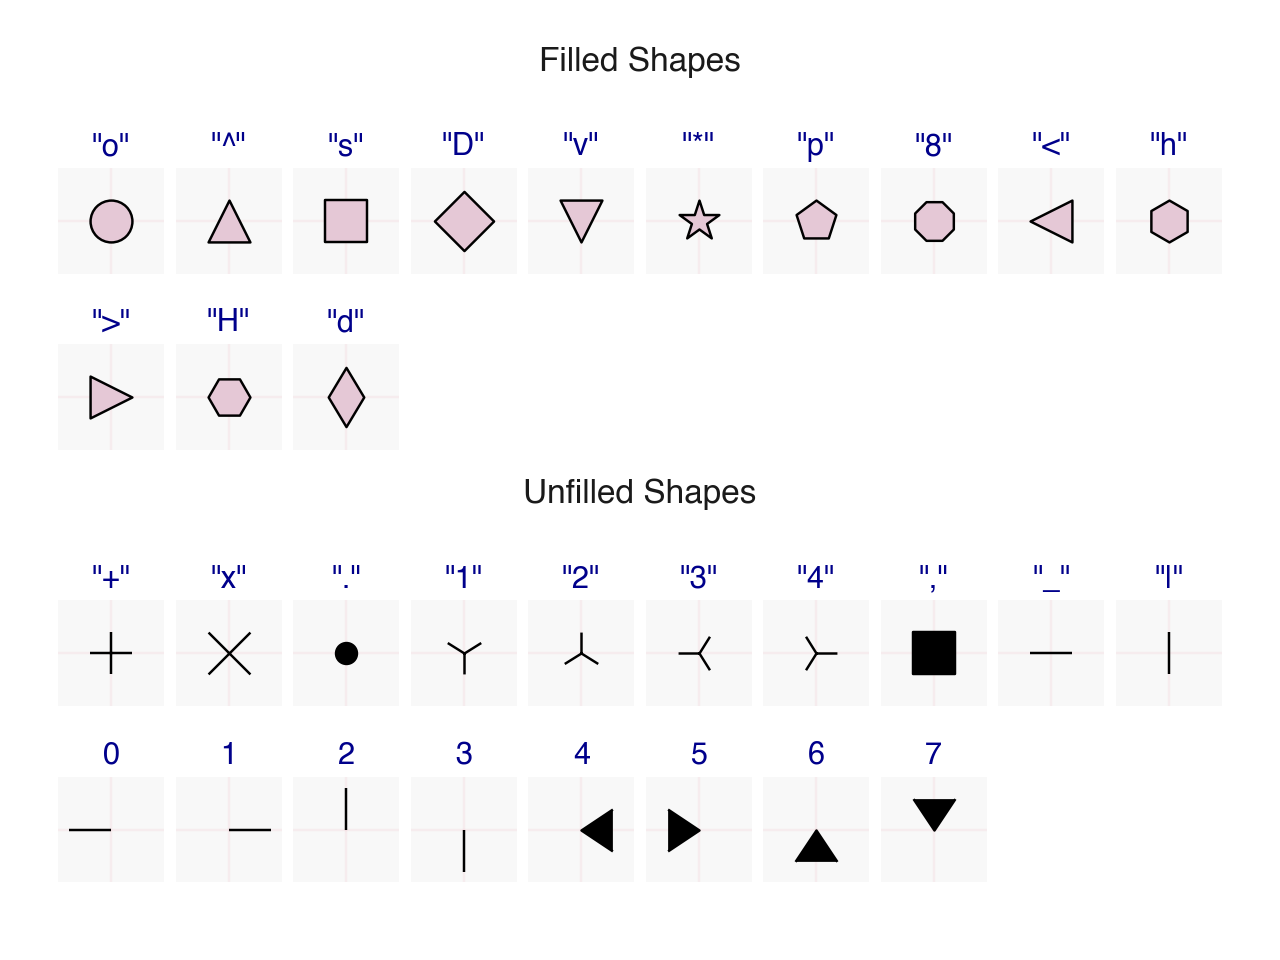

In [3]:
# Gallery, points

def double_quote_strings(series):
    return [
        '"{}"'.format(s) if isinstance(s, str) else "{}".format(s)
        for s in series
    ]

(
    ggplot(df, aes("x", "y"))
    
    # Background
    + geom_tile(aes(width=0.9, height=0.9), fill="#F8F8F8")
    
    # Cross-grid to help see the centering of the shapes
    + geom_segment(aes(x="x-0.45", xend="x+0.45", yend="y"), color="Crimson", alpha=0.05)
    + geom_segment(aes(xend="x", y="y-0.45", yend="y+0.45"), color="Crimson", alpha=0.05)
    
    # The shape
    + geom_point(aes(shape="shape"), fill="#E5C8D6", size=8)

    # Specification value for the shape
    + geom_text(
        aes(y="y+.5", label="double_quote_strings(shape)"),
        color="darkblue",
        va="bottom",
    )

    # Separate the shapes by their kind
    + facet_wrap("shape_kind", ncol=1)

    # Make things pretty
    + lims(y=(2, 5))
    + scale_shape_identity()
    + coord_equal()
    + theme_void()
    + theme(
        plot_background=element_rect(fill="white"),
        strip_text=element_text(size=12)
    )
)